In [1]:
# import necessary libraries for the analysis

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
def get_overlap(list1, list2):
    
    overlap = []
    
    for r1 in list1:
    
        for r2 in list2:
        
            start = max(r1[0], r2[0])
            
            end = min(r1[1], r2[1])
            
            if start <= end:
            
                overlap.append((start, end))
    
    return overlap

In [3]:
list1 = [(0, 10), (15, 20)]

list2 = [(5, 16), (18, 20)]

print(get_overlap(list1, list2))

[(5, 10), (15, 16), (18, 20)]


In [4]:
def merge_ranges(ranges):
    
    if not ranges:
        
        return []

    sorted_ranges = sorted(ranges, key=lambda x: x[0])
    merged = []
    current_start, current_end = sorted_ranges[0]
    
    for start, end in sorted_ranges[1:]:
        
        if start <= current_end:
            current_end = max(current_end, end)
        
        else:
            merged.append((current_start, current_end))
            current_start, current_end = start, end
    
    merged.append((current_start, current_end))
    
    return merged


In [5]:
list1 = [(0, 10), (2, 12), (15, 20)]

list2 = [(5, 16), (7, 13), (18, 20)]

print(get_overlap(list1, list2))

[(5, 10), (7, 10), (5, 12), (7, 12), (15, 16), (18, 20)]


In [6]:
list1 = [(0, 10), (2, 12), (15, 20)]

list2 = [(5, 16), (7, 13), (18, 20)]

print(get_overlap(merge_ranges(list1), merge_ranges(list2)))

[(5, 12), (15, 16), (18, 20)]


In [7]:
def get_tuples(df):
    
    tuples = list(zip(df['POS'], df['END']))
    
    return tuples

In [8]:
def sum_of_ranges(ranges):
    
    total = 0
    
    for (a, b) in ranges:
    
        total += (b - a + 1)
        
    return total

In [9]:
ranges = [(0, 10), (15, 20), (30, 40)]

sum_of_ranges(ranges)

28

In [10]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', \
              'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', \
              'chr20', 'chr21', 'chr22', 'chrX', 'chrY']

# Large DELs

In [11]:
## DELs
somatic_large_DEL_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_glioma_sv_processed/somatic_panel_final/large_svs/DEL'

somatic_large_DEL_final_df_names = []

os.chdir(somatic_large_DEL_path)
temp_files = sorted([i for i in os.listdir(somatic_large_DEL_path) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    somatic_large_DEL_final_df_names.append(file_name[:-4])

In [14]:
large_DEL_similarity_dict_names = []

for df_name in somatic_large_DEL_final_df_names:
    
    print('Currently analyzing: ' + df_name[:-44])
    
    temp_df = globals()[df_name]
    
    temp_output_dict = {}
    
    for compare_df_name in somatic_large_DEL_final_df_names:
                    
        temp_compare_df = globals()[compare_df_name]
        temp_shared_total = 0

        for chromosome in chrom_list:

            temp_range_list = get_tuples(temp_df[temp_df['CHROM'] == chromosome])
            temp_compare_range_list = get_tuples(temp_compare_df[temp_compare_df['CHROM'] == chromosome])

            temp_shared_list_for_chrom = get_overlap(merge_ranges(temp_range_list), \
                                                     merge_ranges(temp_compare_range_list))

            temp_shared_total += sum_of_ranges(temp_shared_list_for_chrom)

        temp_output_dict[compare_df_name[:-44]] = temp_shared_total
    
    globals()[(df_name[:-44] + '_large_DEL_similarity_dict')] = temp_output_dict
    
    large_DEL_similarity_dict_names.append((df_name[:-44] + '_large_DEL_similarity_dict'))

Currently analyzing: A_RR_GBM809
Currently analyzing: A_R_GBM607
Currently analyzing: B_P_GBM593
Currently analyzing: B_R_GBM898
Currently analyzing: C_P_GBM577
Currently analyzing: C_R_GBM625
Currently analyzing: E_RR_GBM937
Currently analyzing: E_R_GBM781
Currently analyzing: F_P_GBM620
Currently analyzing: F_R_GBM691
Currently analyzing: G_P_GBM454
Currently analyzing: G_R_GBM833
Currently analyzing: H_P_GBM460
Currently analyzing: H_R_GBM492
Currently analyzing: I_P_GBM440
Currently analyzing: I_R_GBM532
Currently analyzing: J_P_GBM401
Currently analyzing: J_RR_GBM551
Currently analyzing: J_R_GBM498
Currently analyzing: K_P_GBM529
Currently analyzing: K_R_GBM832
Currently analyzing: L_P_GBM618
Currently analyzing: L_R_SMTB152
Currently analyzing: M_P_GBM672
Currently analyzing: M_R_GBM828
Currently analyzing: N_P_BT2013110
Currently analyzing: N_R_GBM745
Currently analyzing: O_P_GBM703
Currently analyzing: O_R_SMTB781
Currently analyzing: P_P_SMTB123
Currently analyzing: P_R_SMTB26

In [15]:
## Debug

for dict_name in large_DEL_similarity_dict_names:
    
    temp_dict = globals()[dict_name]
    temp_df = globals()[dict_name[:-26] + '_somatic_SV_DELs_panel_wo_gap_wo_highoverlap']
    
    temp_total = 0
    
    for chromosome in chrom_list:
            
            temp_range_list = get_tuples(temp_df[temp_df['CHROM'] == chromosome])
            temp_total += sum_of_ranges(merge_ranges(temp_range_list))

    if temp_total != temp_dict[dict_name[:-26]]:
    
        print('ERROR')
        print(dict_name[:-26])

# Large DUPs

In [16]:
## DUPs
somatic_large_DUP_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_glioma_sv_processed/somatic_panel_final/large_svs/DUP'

somatic_large_DUP_final_df_names = []

os.chdir(somatic_large_DUP_path)
temp_files = sorted([i for i in os.listdir(somatic_large_DUP_path) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    somatic_large_DUP_final_df_names.append(file_name[:-4])

In [17]:
large_DUP_similarity_dict_names = []

for df_name in somatic_large_DUP_final_df_names:
    
    print('Currently analyzing: ' + df_name[:-44])
    
    temp_df = globals()[df_name]
    
    temp_output_dict = {}
    
    for compare_df_name in somatic_large_DUP_final_df_names:
                    
        temp_compare_df = globals()[compare_df_name]
        temp_shared_total = 0

        for chromosome in chrom_list:

            temp_range_list = get_tuples(temp_df[temp_df['CHROM'] == chromosome])
            temp_compare_range_list = get_tuples(temp_compare_df[temp_compare_df['CHROM'] == chromosome])

            temp_shared_list_for_chrom = get_overlap(merge_ranges(temp_range_list), \
                                                     merge_ranges(temp_compare_range_list))

            temp_shared_total += sum_of_ranges(temp_shared_list_for_chrom)

        temp_output_dict[compare_df_name[:-44]] = temp_shared_total
    
    globals()[(df_name[:-44] + '_large_DUP_similarity_dict')] = temp_output_dict
    
    large_DUP_similarity_dict_names.append((df_name[:-44] + '_large_DUP_similarity_dict'))

Currently analyzing: A_RR_GBM809
Currently analyzing: A_R_GBM607
Currently analyzing: B_P_GBM593
Currently analyzing: B_R_GBM898
Currently analyzing: C_P_GBM577
Currently analyzing: C_R_GBM625
Currently analyzing: E_RR_GBM937
Currently analyzing: E_R_GBM781
Currently analyzing: F_P_GBM620
Currently analyzing: F_R_GBM691
Currently analyzing: G_P_GBM454
Currently analyzing: G_R_GBM833
Currently analyzing: H_P_GBM460
Currently analyzing: H_R_GBM492
Currently analyzing: I_P_GBM440
Currently analyzing: I_R_GBM532
Currently analyzing: J_P_GBM401
Currently analyzing: J_RR_GBM551
Currently analyzing: J_R_GBM498
Currently analyzing: K_P_GBM529
Currently analyzing: K_R_GBM832
Currently analyzing: L_P_GBM618
Currently analyzing: L_R_SMTB152
Currently analyzing: M_P_GBM672
Currently analyzing: M_R_GBM828
Currently analyzing: N_P_BT2013110
Currently analyzing: N_R_GBM745
Currently analyzing: O_P_GBM703
Currently analyzing: O_R_SMTB781
Currently analyzing: P_P_SMTB123
Currently analyzing: P_R_SMTB26

# Large INVs

In [18]:
## INVs
somatic_large_INV_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_glioma_sv_processed/somatic_panel_final/large_svs/INV'

somatic_large_INV_final_df_names = []

os.chdir(somatic_large_INV_path)
temp_files = sorted([i for i in os.listdir(somatic_large_INV_path) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    somatic_large_INV_final_df_names.append(file_name[:-4])

In [19]:
large_INV_similarity_dict_names = []

for df_name in somatic_large_INV_final_df_names:
    
    print('Currently analyzing: ' + df_name[:-44])
    
    temp_df = globals()[df_name]
    
    temp_output_dict = {}
    
    for compare_df_name in somatic_large_INV_final_df_names:
                    
        temp_compare_df = globals()[compare_df_name]
        temp_shared_total = 0

        for chromosome in chrom_list:

            temp_range_list = get_tuples(temp_df[temp_df['CHROM'] == chromosome])
            temp_compare_range_list = get_tuples(temp_compare_df[temp_compare_df['CHROM'] == chromosome])

            temp_shared_list_for_chrom = get_overlap(merge_ranges(temp_range_list), \
                                                     merge_ranges(temp_compare_range_list))

            temp_shared_total += sum_of_ranges(temp_shared_list_for_chrom)

        temp_output_dict[compare_df_name[:-44]] = temp_shared_total
    
    globals()[(df_name[:-44] + '_large_INV_similarity_dict')] = temp_output_dict
    
    large_INV_similarity_dict_names.append((df_name[:-44] + '_large_INV_similarity_dict'))

Currently analyzing: A_RR_GBM809
Currently analyzing: A_R_GBM607
Currently analyzing: B_P_GBM593
Currently analyzing: B_R_GBM898
Currently analyzing: C_P_GBM577
Currently analyzing: C_R_GBM625
Currently analyzing: E_RR_GBM937
Currently analyzing: E_R_GBM781
Currently analyzing: F_P_GBM620
Currently analyzing: F_R_GBM691
Currently analyzing: G_P_GBM454
Currently analyzing: G_R_GBM833
Currently analyzing: H_P_GBM460
Currently analyzing: H_R_GBM492
Currently analyzing: I_P_GBM440
Currently analyzing: I_R_GBM532
Currently analyzing: J_P_GBM401
Currently analyzing: J_RR_GBM551
Currently analyzing: J_R_GBM498
Currently analyzing: K_P_GBM529
Currently analyzing: K_R_GBM832
Currently analyzing: L_P_GBM618
Currently analyzing: L_R_SMTB152
Currently analyzing: M_P_GBM672
Currently analyzing: M_R_GBM828
Currently analyzing: N_P_BT2013110
Currently analyzing: N_R_GBM745
Currently analyzing: O_P_GBM703
Currently analyzing: O_R_SMTB781
Currently analyzing: P_P_SMTB123
Currently analyzing: P_R_SMTB26

# Heatmap

In [ ]:
## DELs

# Calculate total bp covered by DELs in each sample

large_DEL_total_bp_dict = []

for df_name in somatic_large_DEL_final_df_names:
    
    print('Currently analyzing: ' + df_name[:-44])
    
    temp_df = globals()[df_name]
    
    temp_output_dict = {}
    
    for compare_df_name in somatic_large_DEL_final_df_names:
                    
        temp_compare_df = globals()[compare_df_name]
        temp_shared_total = 0

        for chromosome in chrom_list:

            temp_range_list = get_tuples(temp_df[temp_df['CHROM'] == chromosome])
            temp_compare_range_list = get_tuples(temp_compare_df[temp_compare_df['CHROM'] == chromosome])

            temp_shared_list_for_chrom = get_overlap(merge_ranges(temp_range_list), \
                                                     merge_ranges(temp_compare_range_list))

            temp_shared_total += sum_of_ranges(temp_shared_list_for_chrom)

        temp_output_dict[compare_df_name[:-44]] = temp_shared_total
    
    globals()[(df_name[:-44] + '_large_DEL_similarity_dict')] = temp_output_dict
    
    large_DEL_similarity_dict_names.append((df_name[:-44] + '_large_DEL_similarity_dict'))

In [21]:
X_R_SMTB241_large_DEL_similarity_dict

{'A_RR_GBM809': 430849,
 'A_R_GBM607': 0,
 'B_P_GBM593': 390001,
 'B_R_GBM898': 0,
 'C_P_GBM577': 20800022,
 'C_R_GBM625': 0,
 'E_RR_GBM937': 146845,
 'E_R_GBM781': 123755,
 'F_P_GBM620': 410001,
 'F_R_GBM691': 1760001,
 'G_P_GBM454': 0,
 'G_R_GBM833': 0,
 'H_P_GBM460': 12830030,
 'H_R_GBM492': 18550039,
 'I_P_GBM440': 64133134,
 'I_R_GBM532': 0,
 'J_P_GBM401': 6161014,
 'J_RR_GBM551': 62106143,
 'J_R_GBM498': 62034110,
 'K_P_GBM529': 4640004,
 'K_R_GBM832': 90573831,
 'L_P_GBM618': 36193,
 'L_R_SMTB152': 650006,
 'M_P_GBM672': 2230001,
 'M_R_GBM828': 0,
 'N_P_BT2013110': 1500002,
 'N_R_GBM745': 16443724,
 'O_P_GBM703': 0,
 'O_R_SMTB781': 0,
 'P_P_SMTB123': 30023678,
 'P_R_SMTB265': 0,
 'Q_P_SMTB665': 0,
 'Q_R_GBM1070': 0,
 'X_R_GBM945': 69426705,
 'X_R_SMTB135': 3020004,
 'X_R_SMTB241': 167099519,
 'X_R_SMTB302': 425271,
 'X_R_SMTB814': 15975531}

# Graph large DEL similarities

In [158]:
# Generate lists for for graphing

different_sample_similarity_dict = {}
same_sample_similarity_dict = {}

for dict_name in large_DEL_similarity_dict_names:
    
    if dict_name[:-26] == 'Q_P_SMTB665':
        
        continue
        
    temp_dict = globals()[dict_name]
    
    different_sample_list = []
    same_sample_list = []
        
    for key in temp_dict:
        
        if key == 'Q_P_SMTB665':
            
            pass
        
        elif key == dict_name[:-26]:
            
            pass
        
        elif (key[0] != 'X') and (key[0] == dict_name[0]):
        
            same_sample_list.append(100*temp_dict[key]/temp_dict[dict_name[:-26]])
                
        else:
                            
            different_sample_list.append(100*temp_dict[key]/temp_dict[dict_name[:-26]])
            

    different_sample_similarity_dict[dict_name[:-26]] = different_sample_list
    same_sample_similarity_dict[dict_name[:-26]] = same_sample_list

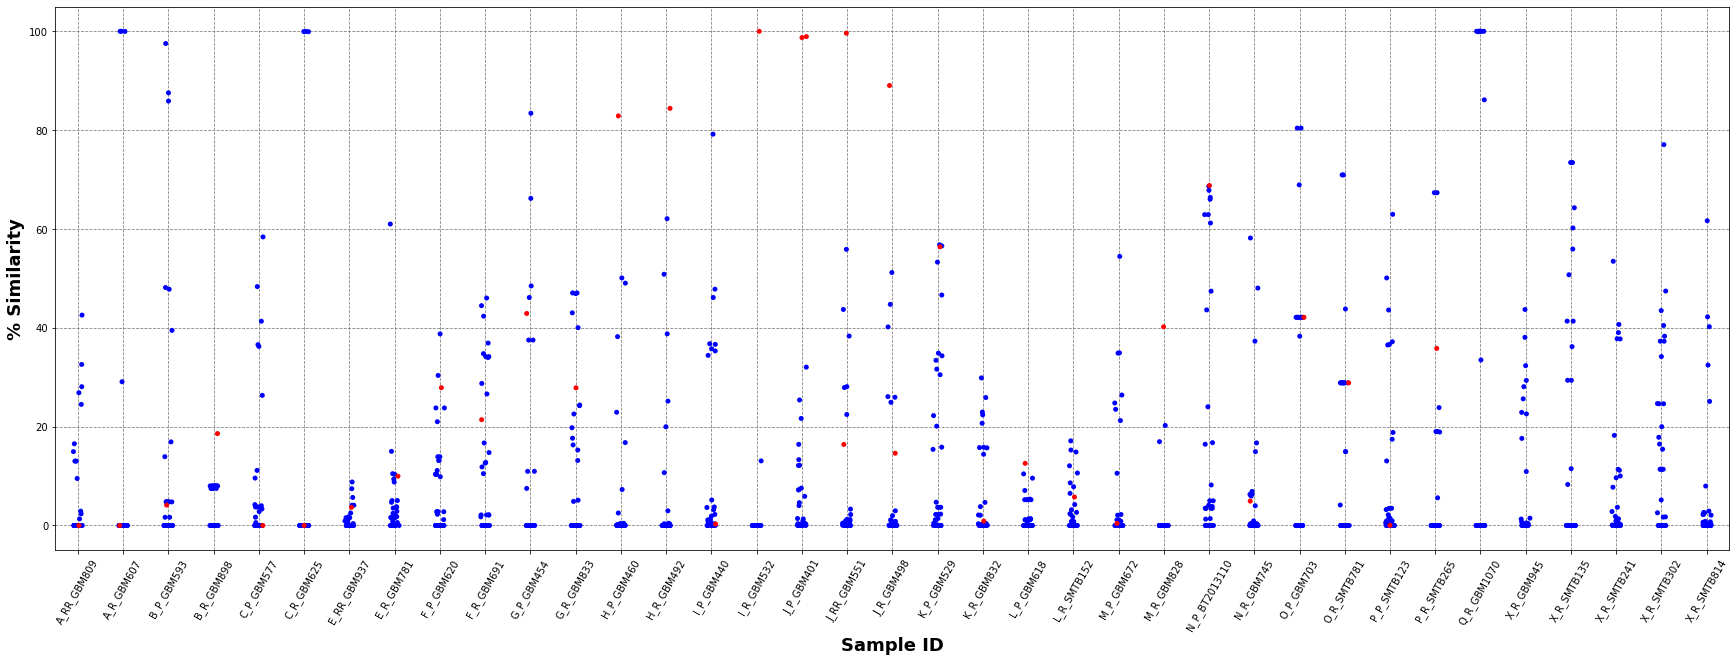

In [159]:
data_df = pd.DataFrame.from_dict(different_sample_similarity_dict, orient='index')
data_df = data_df.transpose()

data_same_df = pd.DataFrame.from_dict(same_sample_similarity_dict, orient='index')
data_same_df = data_same_df.transpose()

fig = plt.figure(figsize =(30, 10))

ax = sns.stripplot(data=data_df, color='blue')
ax = sns.stripplot(data=data_same_df, color='red')

_ = plt.xticks(rotation=60)
_ = ax.set_xlabel('Sample ID', fontweight ='bold', fontsize=18)
_ = ax.set_ylabel('% Similarity', fontweight ='bold', fontsize=18)

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')


fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_del_similarity_grid.png', bbox_inches='tight', dpi=150)

# Graph large DUP similarities

In [166]:
# Generate lists for for graphing

different_sample_similarity_dict = {}
same_sample_similarity_dict = {}

for dict_name in large_DUP_similarity_dict_names:
            
    temp_dict = globals()[dict_name]
    
    different_sample_list = []
    same_sample_list = []
        
    for key in temp_dict:
          
        if key == dict_name[:-26]:
            
            pass
   
        elif (key[0] != 'X') and (key[0] == dict_name[0]):
                
            same_sample_list.append(100*temp_dict[key]/temp_dict[dict_name[:-26]])
                
        else:
            
            different_sample_list.append(100*temp_dict[key]/temp_dict[dict_name[:-26]])
            
    different_sample_similarity_dict[dict_name[:-26]] = different_sample_list
    same_sample_similarity_dict[dict_name[:-26]] = same_sample_list

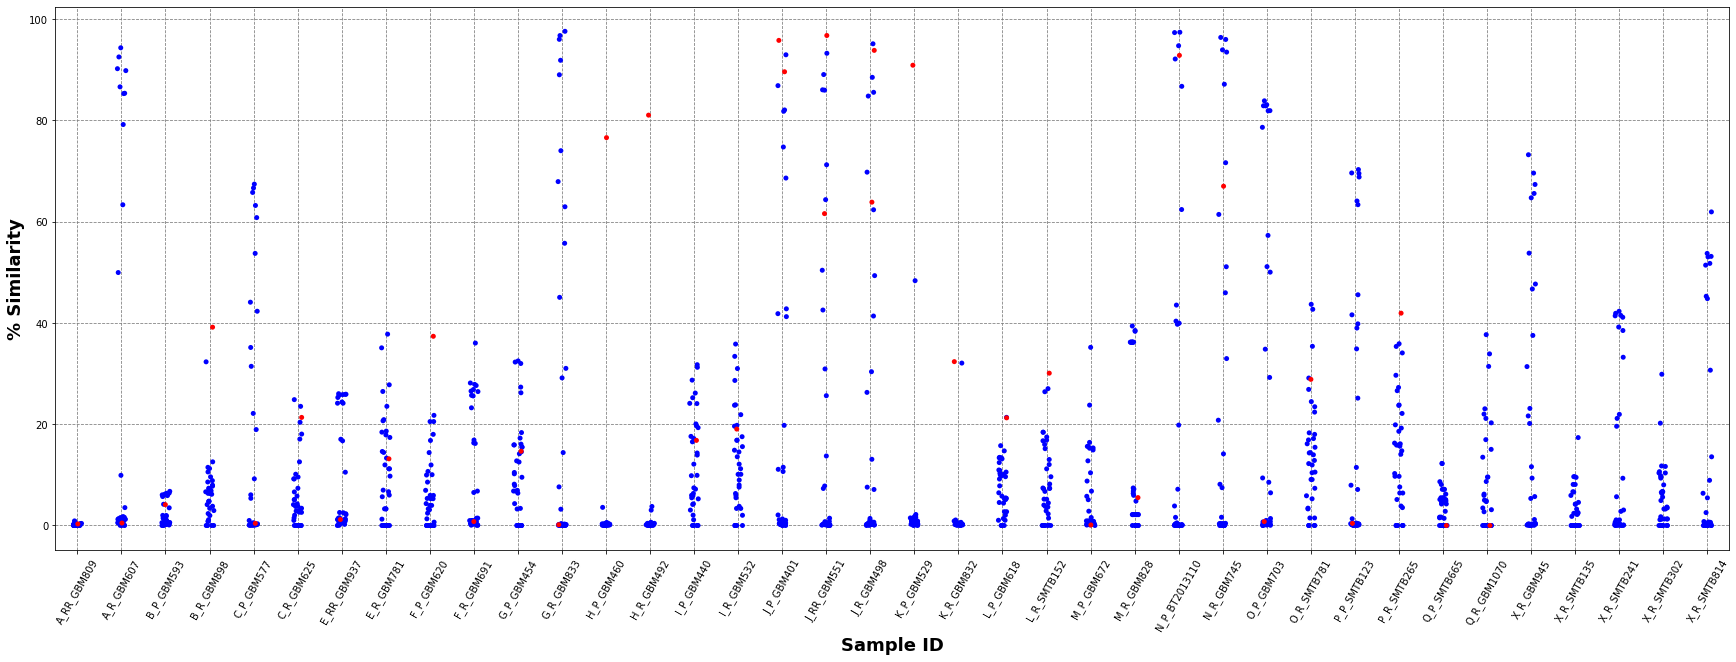

In [167]:
data_df = pd.DataFrame.from_dict(different_sample_similarity_dict, orient='index')
data_df = data_df.transpose()

data_same_df = pd.DataFrame.from_dict(same_sample_similarity_dict, orient='index')
data_same_df = data_same_df.transpose()

fig = plt.figure(figsize =(30, 10))

ax = sns.stripplot(data=data_df, color='blue')
ax = sns.stripplot(data=data_same_df, color='red')

_ = plt.xticks(rotation=60)
_ = ax.set_xlabel('Sample ID', fontweight ='bold', fontsize=18)
_ = ax.set_ylabel('% Similarity', fontweight ='bold', fontsize=18)

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_dup_similarity_grid.png', bbox_inches='tight', dpi=150)

# Graph large INV similarities

In [168]:
# Generate lists for for graphing

different_sample_similarity_dict = {}
same_sample_similarity_dict = {}

for dict_name in large_INV_similarity_dict_names:
    
    temp_dict = globals()[dict_name]
    
    if temp_dict[dict_name[:-26]] == 0:
        continue
        
    different_sample_list = []
    same_sample_list = []
        
    for key in temp_dict:
        
        if key == dict_name[:-26]:
            
            pass
    
        elif (key[0] != 'X') and (key[0] == dict_name[0]):
        
            if key != dict_name[:-26]:
                
                same_sample_list.append(100*temp_dict[key]/temp_dict[dict_name[:-26]])
                
        else:
            
            different_sample_list.append(100*temp_dict[key]/temp_dict[dict_name[:-26]])
            
    different_sample_similarity_dict[dict_name[:-26]] = different_sample_list
    same_sample_similarity_dict[dict_name[:-26]] = same_sample_list

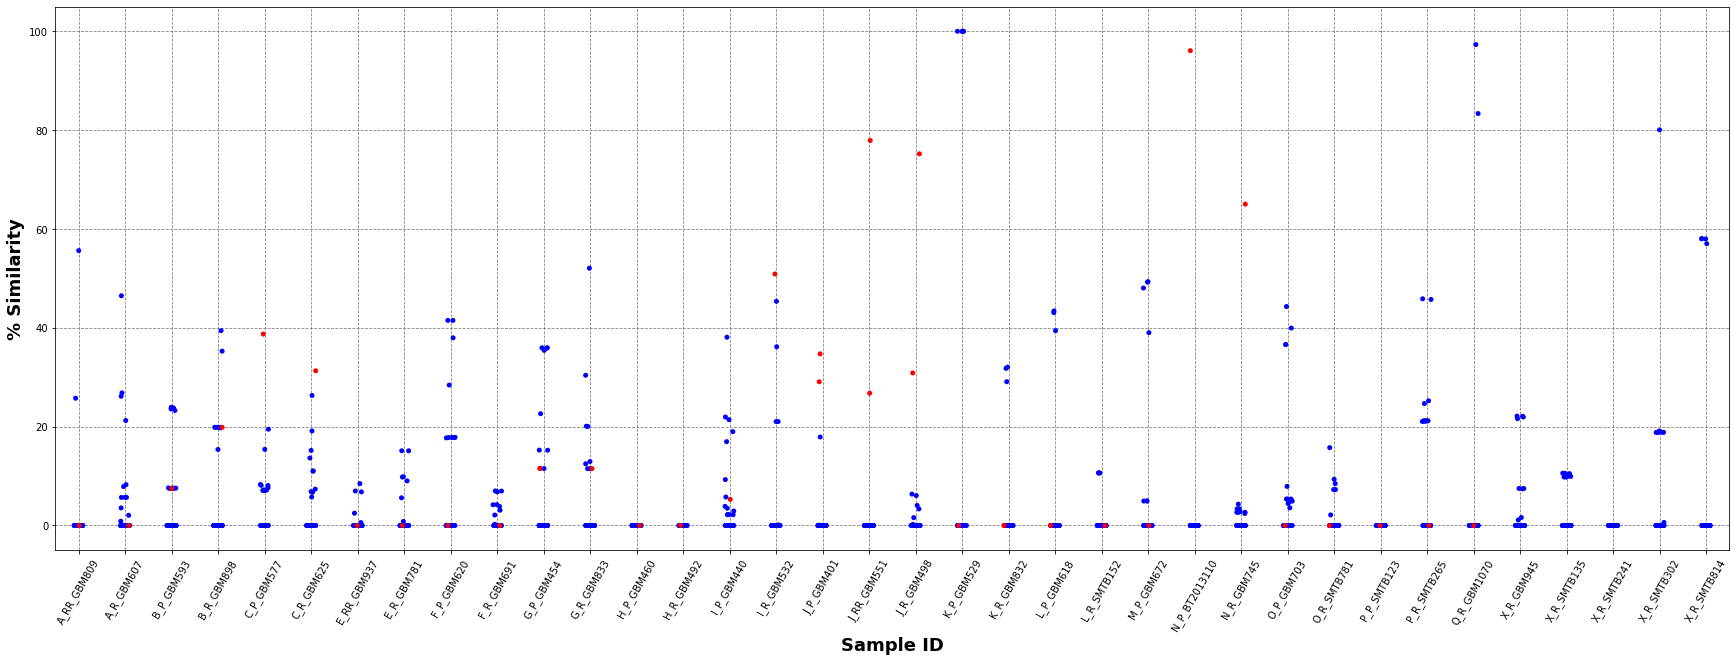

In [169]:
data_df = pd.DataFrame.from_dict(different_sample_similarity_dict, orient='index')
data_df = data_df.transpose()

data_same_df = pd.DataFrame.from_dict(same_sample_similarity_dict, orient='index')
data_same_df = data_same_df.transpose()

fig = plt.figure(figsize =(30, 10))

ax = sns.stripplot(data=data_df, color='blue')
ax = sns.stripplot(data=data_same_df, color='red')

_ = plt.xticks(rotation=60)
_ = ax.set_xlabel('Sample ID', fontweight ='bold', fontsize=18)
_ = ax.set_ylabel('% Similarity', fontweight ='bold', fontsize=18)

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_inv_similarity_grid.png', bbox_inches='tight', dpi=150)